## EDA on SPAM Messages

In [80]:
import pandas as pd

In [81]:
file_path: str = "data/SMSSpamCollection"

df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'text'])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


TODO Sanity checks: Read the readme file in the data folder. How could we check if the data is read correctly?

In [96]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [82]:
len(df) # number of rows

5572

TODO Check if values are null? (If labels or text are null, remove the rows)

In [83]:
df.isna().sum()

label    0
text     0
dtype: int64

TODO describe the data statistically using pandas
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [84]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### Text Analysis

In [85]:
def preprocess_text(text: str):
    return text.lower().split()

In [86]:
preprocessed_column: str = "preprocessed_text"
text_column : str = 'text'

# tokenize and normalize text
df[preprocessed_column] = df[text_column].apply(preprocess_text)

<Axes: ylabel='Frequency'>

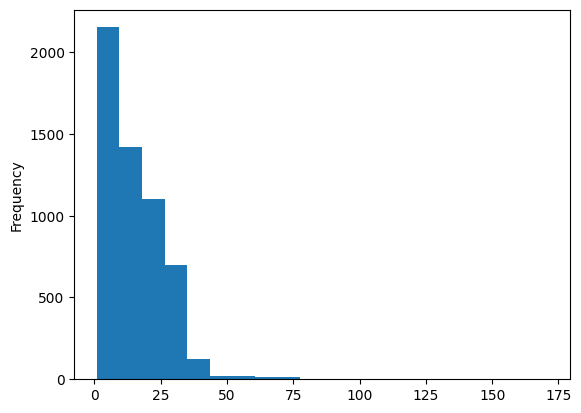

In [87]:
# TODO: add diagram title, tiltes for X/Y

df[preprocessed_column].apply(len).plot(kind="hist", bins=20)

In [88]:
# TODO count the least frequent terms
df.explode(preprocessed_column)[preprocessed_column].value_counts()[:20]

preprocessed_text
to      2237
i       2217
you     1921
a       1433
the     1329
u        998
and      968
is       869
in       859
my       755
for      704
your     677
of       614
me       611
have     571
call     559
on       521
are      487
that     470
it       466
Name: count, dtype: int64

In [89]:
df.explode(preprocessed_column)[preprocessed_column].value_counts()[:-20]

preprocessed_text
to              2237
i               2217
you             1921
a               1433
the             1329
                ... 
province           1
sterling           1
problem-free       1
xam                1
hall               1
Name: count, Length: 13559, dtype: int64

In [90]:
# TODO many of the top frequent words are stopwords. Remove them using NLTK
# use the corpus module for that (https://www.nltk.org/howto/corpus.html#word-lists-and-lexicons)predictionprepre
import nltk
nltk.download('stopwords')

eng_stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text: str):
    return [word for word in text if word not in eng_stopwords]
df[preprocessed_column] = df[preprocessed_column].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /home/robin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Correlations

In [91]:
# take the 20 most frequent words, and correlate to labels
df_words_exploded = df.explode(preprocessed_column)
top_20_words: list[str] = df_words_exploded[preprocessed_column].value_counts()[:20].index.tolist()
top_20_words

['u',
 'call',
 '2',
 'ur',
 'get',
 '&lt;#&gt;',
 'go',
 '4',
 '.',
 'like',
 'got',
 'know',
 'free',
 'come',
 'good',
 '?',
 'send',
 'want',
 'text',
 'time']

In [92]:
columns = ['is_spam']
df['is_spam'] = df['label']=='spam'

for token in top_20_words:
    token_column = f"{token}_count"
    df[token_column] = df[preprocessed_column].apply(lambda token_list: token_list.count(token))
    columns.append(token_column)

In [93]:
df[columns].corr()

,is_spam,u_count,call_count,2_count,ur_count,get_count,&lt;#&gt;_count,go_count,4_count,._count,...,got_count,know_count,free_count,come_count,good_count,?_count,send_count,want_count,text_count,time_count
is_spam,1.000000,-0.016533,0.435658,0.170459,0.148992,0.063185,-0.054975,-0.019606,0.137870,-0.017972,...,-0.061544,-0.022124,0.341120,-0.069303,-0.040010,-0.032921,0.116530,0.012641,0.241667,-0.019515
u_count,-0.016533,1.000000,-0.002205,0.206693,0.105819,0.022617,0.009996,0.032997,0.082588,0.101842,...,0.019046,0.047529,-0.011392,0.002561,0.008521,-0.025827,0.033551,-0.012214,0.002878,0.051768
call_count,0.435658,-0.002205,1.000000,0.016951,-0.028291,-0.026524,-0.029301,-0.030537,-0.001441,-0.000175,...,-0.030679,-0.018694,0.166513,-0.029447,-0.031537,-0.026889,-0.038336,0.007887,0.018559,-0.002953
2_count,0.170459,0.206693,0.016951,1.000000,0.126143,0.010688,-0.000968,0.057105,0.184944,-0.003588,...,0.045564,-0.025282,0.070792,-0.010432,-0.017768,-0.020032,0.010673,0.052115,0.010188,0.030422
ur_count,0.148992,0.105819,-0.028291,0.126143,1.000000,0.045892,-0.004759,0.001654,0.137874,0.021699,...,0.004618,-0.015392,0.083934,0.002101,0.058954,-0.014265,0.074485,-0.010760,0.005434,-0.005129
get_count,0.063185,0.022617,-0.026524,0.010688,0.045892,1.000000,0.019954,0.018263,0.056890,-0.012254,...,-0.002639,0.011359,0.116618,0.007124,-0.001819,0.009818,0.045534,0.020724,0.053527,0.028802
&lt;#&gt;_count,-0.054975,0.009996,-0.029301,-0.000968,-0.004759,0.019954,1.000000,-0.011328,-0.001422,0.525129,...,0.012937,0.018309,-0.000644,-0.009441,0.090154,-0.002095,0.021171,-0.000176,-0.014869,-0.003863
go_count,-0.019606,0.032997,-0.030537,0.057105,0.001654,0.018263,-0.011328,1.000000,0.125074,0.006282,...,0.062845,0.011403,0.017508,0.009511,-0.018153,0.046492,-0.003784,0.068603,-0.021610,0.008557
4_count,0.137870,0.082588,-0.001441,0.184944,0.137874,0.056890,-0.001422,0.125074,1.000000,-0.000041,...,0.023784,-0.024781,0.091955,-0.023194,-0.025160,-0.009314,0.023494,-0.023067,0.008241,0.014518
._count,-0.017972,0.101842,-0.000175,-0.003588,0.021699,-0.012254,0.525129,0.006282,-0.000041,1.000000,...,0.001264,-0.002937,-0.012179,0.059921,0.093967,-0.004249,-0.001865,-0.008375,-0.005865,0.001219


<Axes: >

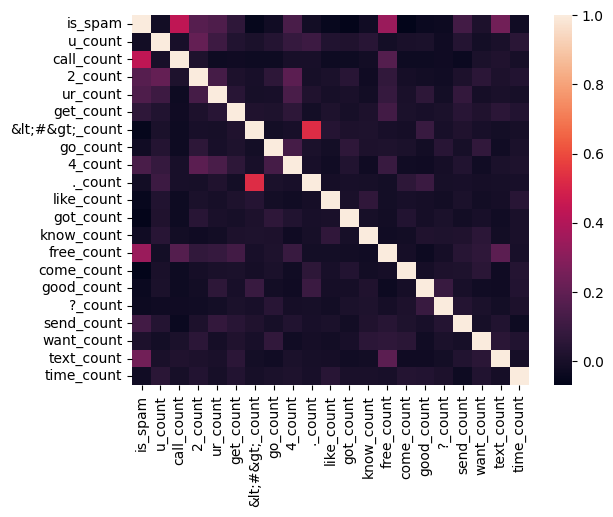

In [94]:
import seaborn

seaborn.heatmap(df[columns].corr())

In [95]:
# save data to csv
df.to_csv('data/prepared_sms_data.csv', index=False)